In [86]:
import pandas as pd
import pandas_profiling as pp
import seaborn as sea

In [87]:
df = pd.read_csv('titanic.csv')

In [88]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
# profile = pp.ProfileReport(df=df)
# profile.to_file(output_file='data_report.html')

In [90]:
df.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [91]:
df['family'] = df['SibSp'] + df['Parch']

<AxesSubplot:xlabel='Age', ylabel='Fare'>

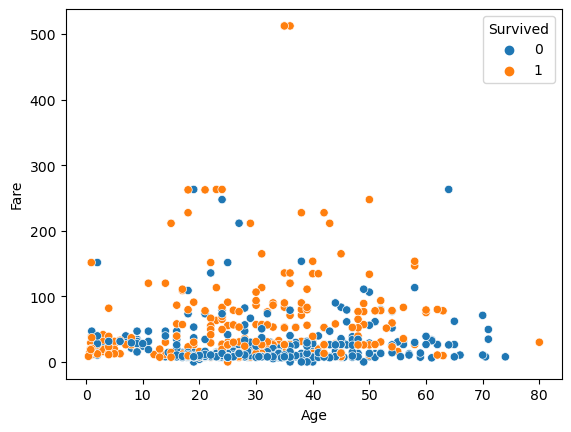

In [92]:
sea.scatterplot(x='Age',y='Fare',data=df,hue='Survived')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

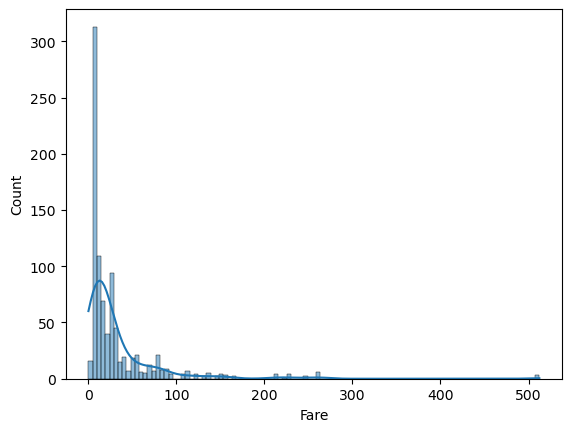

In [93]:
sea.histplot(data=df['Fare'],kde=True)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

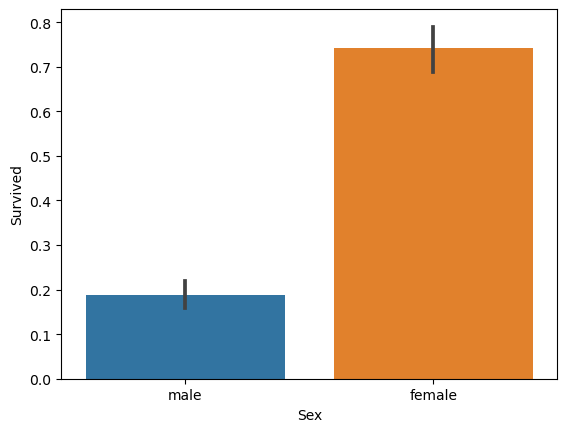

In [94]:
sea.barplot(data=df,x='Sex',y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

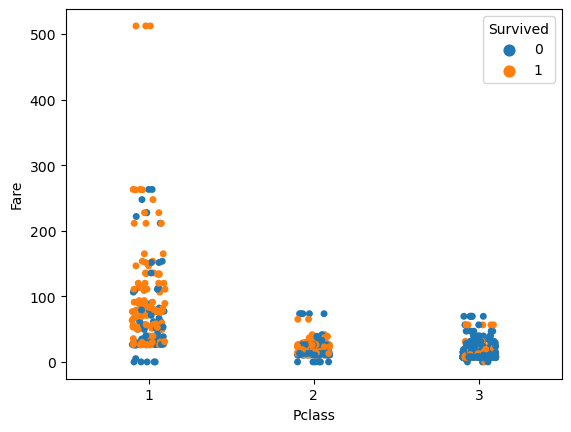

In [95]:
sea.stripplot(x='Pclass',y='Fare',hue='Survived',data=df,dodge=False)

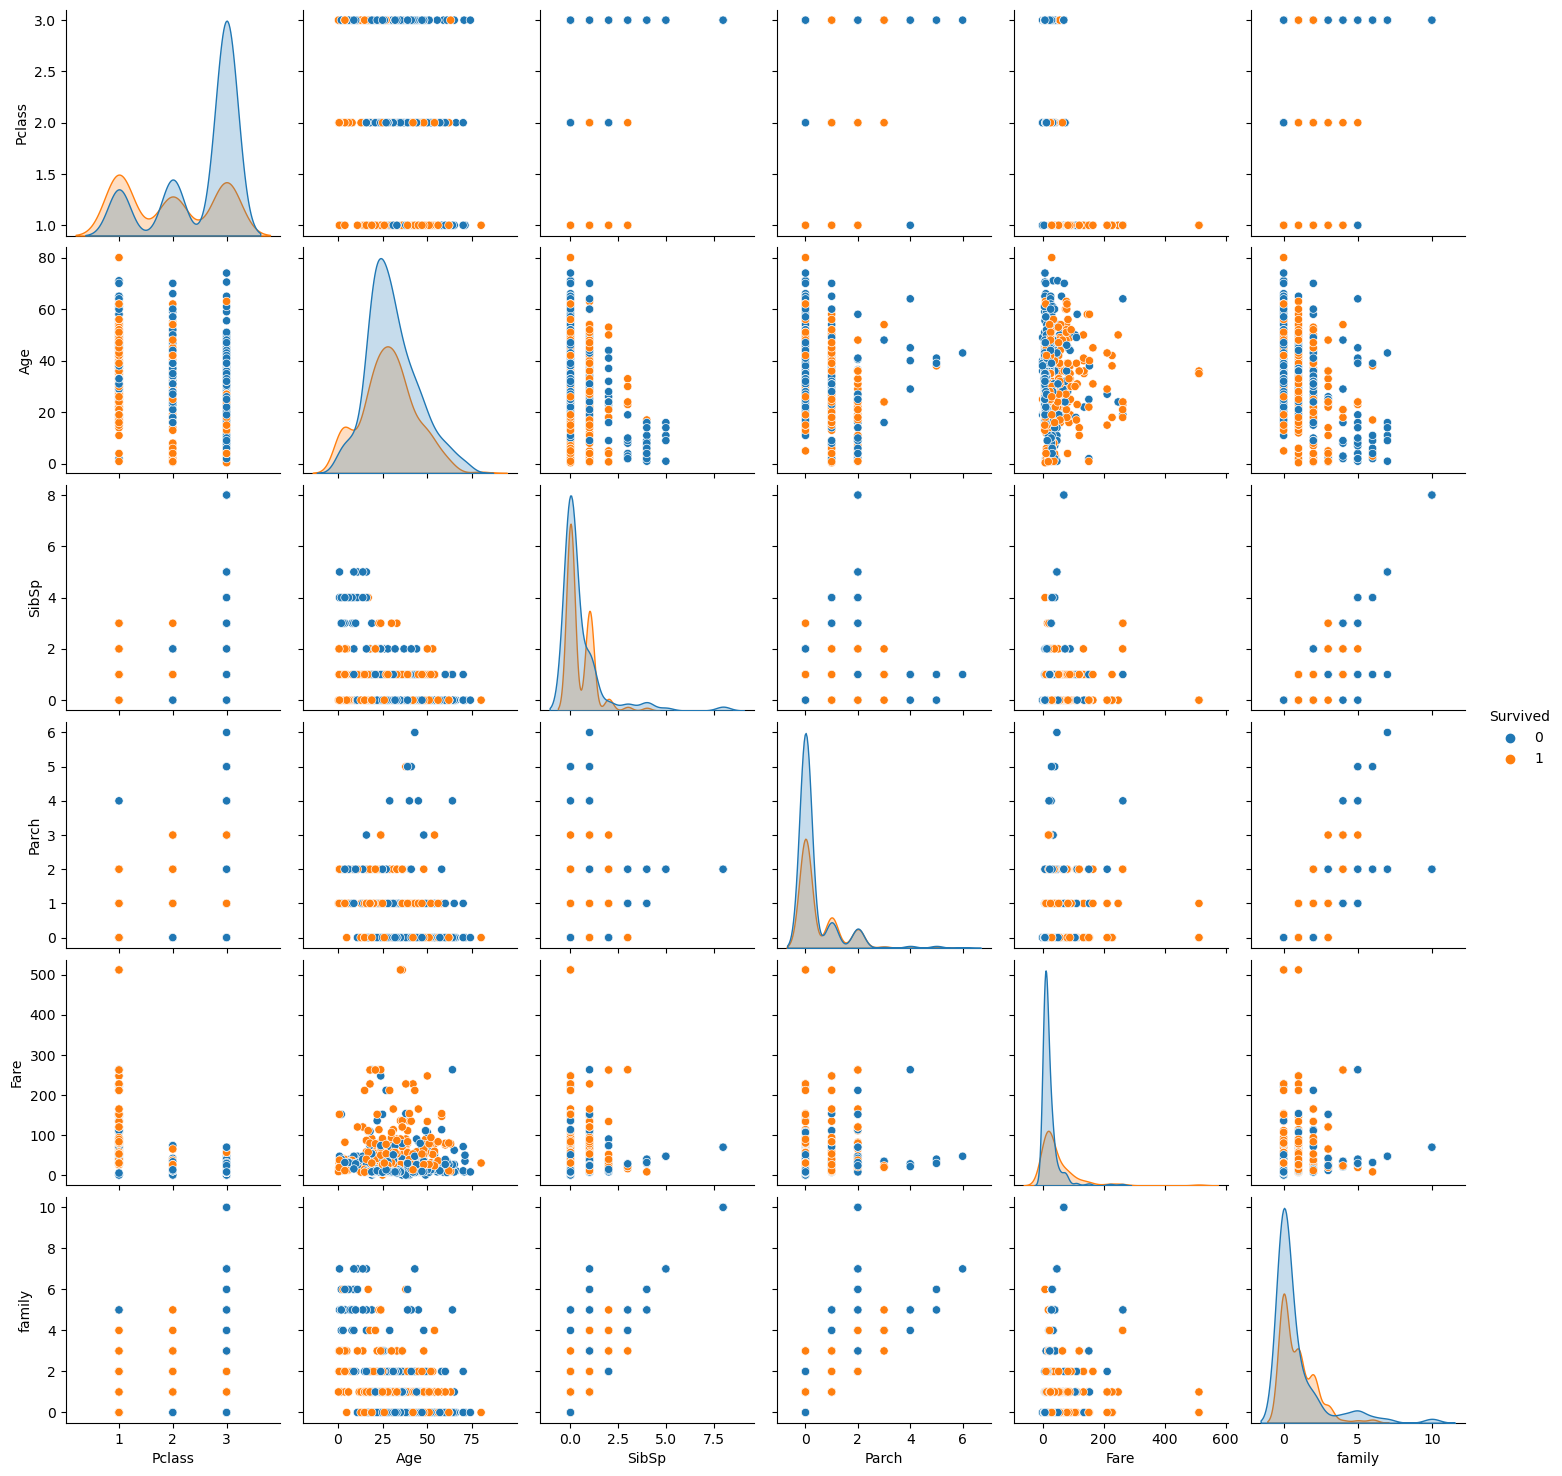

In [99]:
sea.pairplot(df.select_dtypes(['number']),hue='Survived')